# Climate Change

By: Ryan Boyle, Caleb Gupta, and Christa Simaan

# Introduction

Inside this notebook, we will be using a staff proposed data set, Earth Surface Temperature Data, as well as two additional csv files on boh greenhouse gases and natural disaster rates in order to analyze information about the varying surface temperatures on Earth! (and many of the possible consequences of such actions).

This project is rather interesting because climate change has been more and more of an increasing issue. We are excited to show you how it has and will affect countries, major cities, and states. This deck is best used in the context of current events (specifically political actions towards climate), where one can observe the specific temperatures and natural disasters of regions that chose specific actions. Of course, due to geographical proximity, even this must be interpretted fully in context. 

We take several actions in order to organize this data into interpretable chunks. The overall structure is as follows:

*   Data Wrangling of the State, City, and Country tables
*   Exploratory Data Analysis and Visualization of the Average Temperatures
* Using Machine Learning to Make Temperature Predictions
* Conncection to Natural Disasters

We use different techniques and figures to represent the interconnection and correlations between these surface temperatures with various possible attrocities so that we can see for ourselves the trends. This is a topic that often has misinformation and we have seen through working with the data that there are many exceptions from the overall trends that can be cherry picked in order to demonstrate certain narratives. We aim that this presentation is able to be a wholistic and accurate representation of the data.

The timeline in which we predict most of our models span until 2050 and with major legislation planned to take full effect a full decade before this we found that any further predictions would not reflect the state of the world accurately. We hope you enjoy the cool, groundbreaking results from this dataset and can potentially re-observe them in 2050 to see if the temperature predictions held true.

# Section 0: Libraries and Set Up

In [ ]:
# Versioning again
!pip install pandas==1.1.5

In [ ]:
# Sklearn and Pandas Setup
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import cm
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state infor

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
! pip install lightning-python

# Section 1: Data Wrangling and Cleaning



**Reading in the data from CSV files**


---



Here, we read in the CSVs for Major Cities, Countries, and States in order to get them into their own respective dataframe. We used data from Kaggle, which can be found [here](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data).

In [ ]:
cities_df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [ ]:
countries_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [ ]:
states_df = pd.read_csv('GlobalLandTemperaturesByState.csv')

**Cleaning the data**


---


For each dataframe, we will:

*   Drop all rows with null values
*   Rename the 'dt' column to 'Date'
*   Make 'Year', 'Month', and 'Day' columns using the 'Date' column
*   Change the 'Year' column to be of type int64





Below, we drop the NA cells in each of the dataframes we created.


In [ ]:
#drop NA
cities_df = cities_df.dropna()
countries_df = countries_df.dropna()
states_df = states_df.dropna()

Below, we rename the dt column in each of the dataframes we created to be Date.

In [ ]:
#Rename dt to Date
cities_df = cities_df.rename(columns={'dt' : 'Date'})
countries_df = countries_df.rename(columns={'dt' : 'Date'})
states_df = states_df.rename(columns={'dt' : 'Date'})

Below, we split up the Date column into a Year, Month, and Day column so that we can group in terms of year and analyze the data over the years.

In [ ]:
# Make year, month, and date column for each df
cities_df[['Year', 'Month', 'Day']] = cities_df.Date.str.split('-', expand=True)
countries_df[['Year', 'Month', 'Day']] = countries_df.Date.str.split('-', expand=True)
states_df[['Year', 'Month', 'Day']] = states_df.Date.str.split('-', expand=True)


Below, we save a copy of the original dataframes, and name them cities_monthly_df, countries_monthly_df, and states_monthly_df. We also create dataframes cities_yearly_df, countries_yearly_df, and states_yearly_df, which store the yearly average temperature of every city, country, or state respectively. In each of cities_yearly_df, countries_yearly_df, and states_yearly_df, we drop the unnecassary columns. 

In [ ]:
#Save the monthly data into seperate dataframes
cities_monthly_df = cities_df
countries_monthly_df = countries_df
states_monthly_df = states_df

# groupby the year
cities_yearly_df = cities_df.groupby(['City', 'Year']).mean().reset_index()
countries_yearly_df = countries_df.groupby(['Country', 'Year']).mean().reset_index()
states_yearly_df = states_df.groupby(['State', 'Year']).mean().reset_index()

Below, we will change the Date column of each dataframe to be of type int64.

In [ ]:
#Change the Year column to be of type int64
cities_monthly_df = cities_monthly_df.astype({"Year": 'int64'}, errors='raise') 
countries_monthly_df = countries_monthly_df.astype({"Year": 'int64'}, errors='raise') 
states_monthly_df = states_monthly_df.astype({"Year": 'int64'}, errors='raise')

cities_yearly_df = cities_yearly_df.astype({"Year": 'int64'}, errors='raise') 
countries_yearly_df = countries_yearly_df.astype({"Year": 'int64'}, errors='raise') 
states_yearly_df = states_yearly_df.astype({"Year": 'int64'}, errors='raise') 

# Section 2: Exploratory Data Analysis and Visualization

**Familiarizing ourselves with the data**


---



Below, we used the .info() and .describe() functions to explore the characteristics of the data that we are working with to identify what aspects of the data we need to keep in mind as we continue with EDA. \
*Not all of this is shown in code below

In [ ]:
cities_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228175 entries, 0 to 239175
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           228175 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           228175 non-null  object 
 4   Country                        228175 non-null  object 
 5   Latitude                       228175 non-null  object 
 6   Longitude                      228175 non-null  object 
 7   Year                           228175 non-null  int64  
 8   Month                          228175 non-null  object 
 9   Day                            228175 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 19.1+ MB


In [ ]:
cities_monthly_df.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year
count,228175.000000,228175.000000,228175.000000
mean,18.125969,0.969343,1913.893209
std,10.024800,0.979644,62.025981
min,-26.772000,0.040000,1743.000000
25%,12.710000,0.340000,1869.000000
50%,20.428000,0.592000,1918.000000
75%,25.918000,1.320000,1966.000000
max,38.283000,14.037000,2013.000000


In [ ]:
cities_yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19202 entries, 0 to 19201
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   City                           19202 non-null  object 
 1   Year                           19202 non-null  int64  
 2   AverageTemperature             19202 non-null  float64
 3   AverageTemperatureUncertainty  19202 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 600.2+ KB


In [ ]:
cities_yearly_df.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty
count,19202.000000,19202.000000,19202.000000
mean,1913.257838,18.116962,0.976424
std,62.650746,7.545467,0.859468
min,1743.000000,-6.385750,0.150250
25%,1868.000000,11.452750,0.371750
50%,1917.000000,19.493208,0.600250
75%,1965.000000,25.363333,1.400646
max,2013.000000,30.730167,6.952167


In [ ]:
len(cities_monthly_df['City'].unique())

100

In [ ]:
len(countries_monthly_df['Country'].unique())

242

Some things that we noticed: the data in the AverageTemperature column is in units of degrees Celcius, the dataset includes data starting at the year 1743 up until the year 2013, the cities dataset includes data for 100 different cities, and the countries dataset includes data for 242 different countries. Additionally, we noted that the original dataset includes the average temperature of each city, country, or state from every month of every year. However, since we dropped rows with null values, data from some months are missing in the monthly dataframes. 

**Identifying the hottest and coldest cities**


---



First, we wanted to identify the 5 hottest cities and 5 coldest cities in the year 2013. We stored these in dataframes called hottest_5_cities_df and coldest_5_cities_df respectively. 

In [ ]:
hottest_5_cities_df = cities_yearly_df[cities_yearly_df['Year'] == 2013].sort_values('AverageTemperature', ascending=False).head(5)
coldest_5_cities_df = cities_yearly_df[cities_yearly_df['Year'] == 2013].sort_values('AverageTemperature', ascending=True).head(5)

In [ ]:
hottest_5_cities_df

,City,Year,AverageTemperature,AverageTemperatureUncertainty
18849,Umm Durman,2013,30.650500,0.693625
11001,Madras,2013,30.411750,0.763875
1770,Bangkok,2013,28.984750,0.444125
8230,Jiddah,2013,28.875875,0.842750
7037,Hyderabad,2013,28.851250,0.633000


In [ ]:
coldest_5_cities_df

,City,Year,AverageTemperature,AverageTemperatureUncertainty
6652,Harbin,2013,5.616875,0.797500
15904,Santiago,2013,5.938125,0.424250
15570,Saint Petersburg,2013,6.058750,0.329125
12645,Moscow,2013,6.798875,0.441000
3953,Changchun,2013,6.938500,0.655500


From this, we can see that Umm Durman (Omdurman), Madras, Bangkok, Jiddah, and Hyderabad were the 5 hottest cities in the year 2013, and Harbin, Santiago, Saint Petersburg, Moscow, and Changchun were the 5 coldest cities in the year 2013. Below, we use a barplot to visualize the 2013 average temperature of these 5 hottest and 5 coldest cities. 

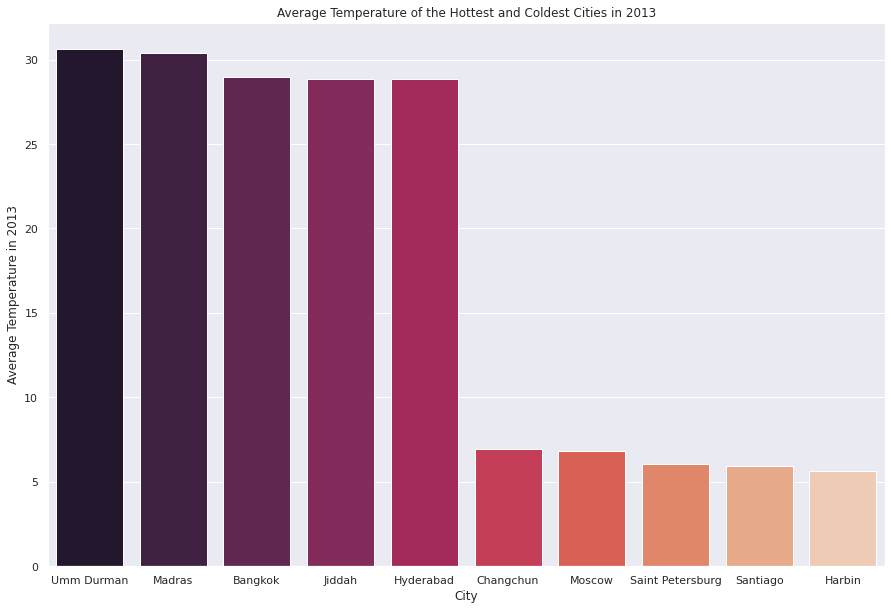

In [ ]:
hottest_coldest_cities_df = pd.concat([hottest_5_cities_df, coldest_5_cities_df]).sort_values('AverageTemperature', ascending=False)
sns.set(rc = {'figure.figsize':(15,10)})
hottest_coldest_barplot = sns.barplot(x = 'City', y = 'AverageTemperature', data = hottest_coldest_cities_df, palette = 'rocket')
hottest_coldest_barplot.set(title = 'Average Temperature of the Hottest and Coldest Cities in 2013')
hottest_coldest_barplot.set(xlabel = 'City', ylabel = 'Average Temperature in 2013')
hottest_coldest_barplot

**Visualizing temperature geographically in US states**


---



We then wanted to visualize the temperature of different geographic regions in a map to see how geographic location affects temperature. To do this, we used Lightning to visualize the average temperature in US states in the year 2013. 


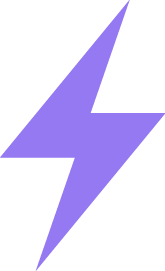

Running local mode, some functionality limited.



In [ ]:
from lightning import Lightning
from numpy import random

states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

US_states_monthly_df = states_monthly_df[states_monthly_df['Country'] == 'United States']
US_states_yearly_df = US_states_monthly_df.groupby(['State', 'Year']).mean().reset_index()
US_states_2013_df = US_states_yearly_df[(US_states_yearly_df['Year'] == 2013) & (US_states_yearly_df['State'] != 'District Of Columbia')]

values = list(US_states_2013_df['AverageTemperature'])
lgn = Lightning(ipython=True, local=True)
lgn.map(states, values, colormap = 'Greens')

In the map above, darker colors represent higher temperature. We can clearly see that temperatures increase as you go further south. That is, southern states in the US had a higher average temperature in 2013 than northern states. This makes sense and aligns with what we had expected because regions closer to the equator have higher temperatures. 

**Visualizing seasonal trends in the data**


---



Since temperatures rise during the summer and fall during the winter, following a yearly cycle, we knew that if we were to plot the monthly data for any city, we would be able to see this seasonal trend. We decided to plot the monthly average temperature data from 1995 to 2000 for the city Umm Durman to visualize this yearly cycle. 

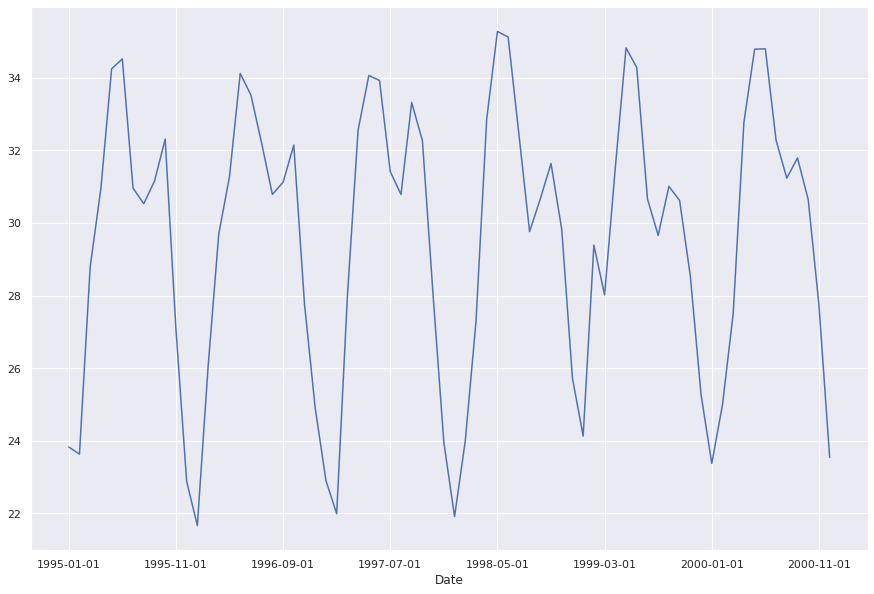

In [ ]:
UmmDurman_monthly = cities_monthly_df[(cities_monthly_df['City'] == 'Umm Durman') & (cities_monthly_df['Year'] >= 1995) & (cities_monthly_df['Year'] <= 2000)]
UmmDurman_monthly = UmmDurman_monthly.set_index('Date')
sns.set(rc = {'figure.figsize': (15, 10)})
UmmDurman_monthly['AverageTemperature'].plot()

The average temperature in Umm Durman is around the same during the same month of each year. This is exactly what we would expect of this data because temperature changes depending on the season and follows a yearly cycle. We can deduce from the plot that the temperature in Umm Durman is highest during May and June, and the temperature is lowest in January and February. 

If we were to plot the yearly average temperature for any city, we would not see these seasonal cycles. We would expect the yearly average temperature of any city to be somewhat consistent, potentially rising or falling due to climate change. Below, we use a boxplot to visualize the temperature distributions by year in Umm Durman from 1995 to 2000.

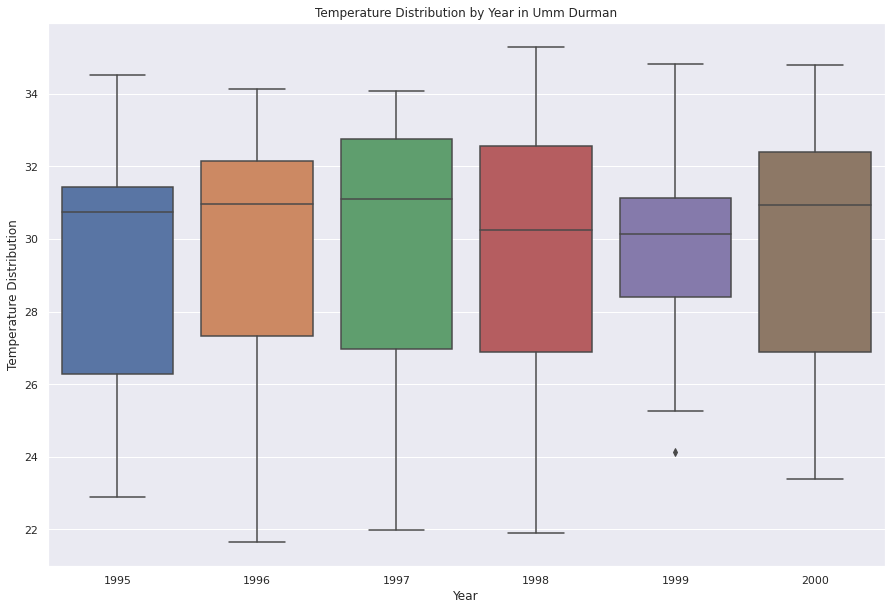

In [ ]:
UmmDurman_monthly = cities_monthly_df[(cities_monthly_df['City'] == 'Umm Durman') & (cities_monthly_df['Year'] >= 1995) & (cities_monthly_df['Year'] <= 2000)]
years = pd.DataFrame()
years['1995'] = pd.Series(list(UmmDurman_monthly[UmmDurman_monthly['Year'] == 1995]['AverageTemperature']), index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
years['1996'] = pd.Series(list(UmmDurman_monthly[UmmDurman_monthly['Year'] == 1996]['AverageTemperature']), index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
years['1997'] = pd.Series(list(UmmDurman_monthly[UmmDurman_monthly['Year'] == 1997]['AverageTemperature']), index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
years['1998'] = pd.Series(list(UmmDurman_monthly[UmmDurman_monthly['Year'] == 1998]['AverageTemperature']), index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
years['1999'] = pd.Series(list(UmmDurman_monthly[UmmDurman_monthly['Year'] == 1999]['AverageTemperature']), index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
years['2000'] = pd.Series(list(UmmDurman_monthly[UmmDurman_monthly['Year'] == 2000]['AverageTemperature']), index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#years.boxplot()
UmmDurman_box_plot = sns.boxplot(data = years)
UmmDurman_box_plot.set(title = 'Temperature Distribution by Year in Umm Durman')
UmmDurman_box_plot.set(xlabel = 'Year', ylabel = 'Temperature Distribution')
UmmDurman_box_plot


In this boxplot the data looks stationary, meaning that there are no obvious trends or seasonality when we consider the yearly average temperature.

**Analyzing temperature change over time**


---



Due to global climate change, we expect that there has been a change in temperature over time. In particular, we think that global warming has caused temperatures to increase in many countries. Below, we plotted the monthly temperature in the US in the years 1900 and 2000 side-by-side. 

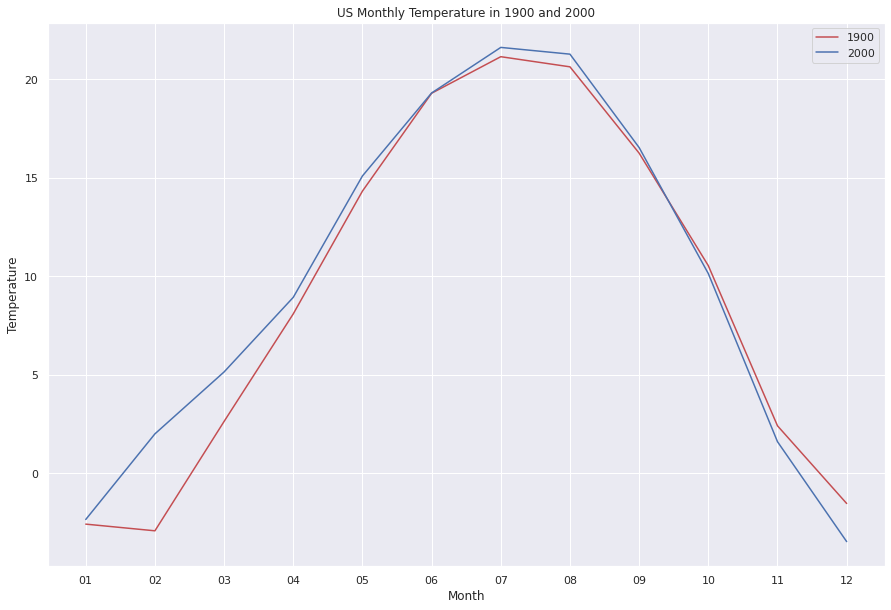

In [ ]:
US_monthly_1900_df = countries_monthly_df[(countries_monthly_df['Country'] == 'United States') & (countries_monthly_df['Year'] == 1900)]
US_monthly_2000_df = countries_monthly_df[(countries_monthly_df['Country'] == 'United States') & (countries_monthly_df['Year'] == 2000)]
plt.plot(US_monthly_1900_df['Month'], US_monthly_1900_df['AverageTemperature'], color = 'r', label= '1900')
plt.plot(US_monthly_2000_df['Month'], US_monthly_2000_df['AverageTemperature'], color = 'b',label = '2000')
plt.legend()
plt.title('US Monthly Temperature in 1900 and 2000')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

From this plot, we can clearly see that the US temperature during the months of January to September in 2000 was greater than the temperature during those months in 1900. 

We then wanted to see if any cities, states, or countries have experienced a significant change in average yearly temperature between 1900 and 2000. We started with our cities data set. 

In [ ]:
cities_1900_df = cities_yearly_df[cities_yearly_df['Year'] == 1900][['City', 'AverageTemperature']]
cities_1900_df = cities_1900_df.rename(columns={'AverageTemperature' : 'AvgTempIn1900'})

cities_2000_df = cities_yearly_df[cities_yearly_df['Year'] == 2000][['City', 'AverageTemperature']]
cities_2000_df = cities_2000_df.rename(columns={'AverageTemperature' : 'AvgTempIn2000'})

cities_1900_2000_df = pd.merge(cities_1900_df, cities_2000_df, how="inner", on=['City'])
cities_1900_2000_df['ChangeInAvgTemp'] = cities_1900_2000_df['AvgTempIn2000'] - cities_1900_2000_df['AvgTempIn1900']
cities_1900_2000_df = cities_1900_2000_df.sort_values('ChangeInAvgTemp', ascending=False).reset_index()
cities_1900_2000_df

,index,City,AvgTempIn1900,AvgTempIn2000,ChangeInAvgTemp
0,79,Saint Petersburg,3.237000,6.184667,2.947667
1,65,Moscow,3.267583,5.960917,2.693333
2,60,Mashhad,11.854833,14.154417,2.299583
3,48,Kiev,7.006333,8.818750,1.812417
4,10,Berlin,9.161500,10.963667,1.802167
...,...,...,...,...,...
95,74,Pune,25.287833,25.110917,-0.176917
96,67,Nagpur,26.560750,26.181417,-0.379333
97,36,Hyderabad,27.647333,27.231833,-0.415500
98,71,New York,10.398000,9.969083,-0.428917


Text(0.5, 1.0, 'Cities Average Temperature 1900 vs 2000')

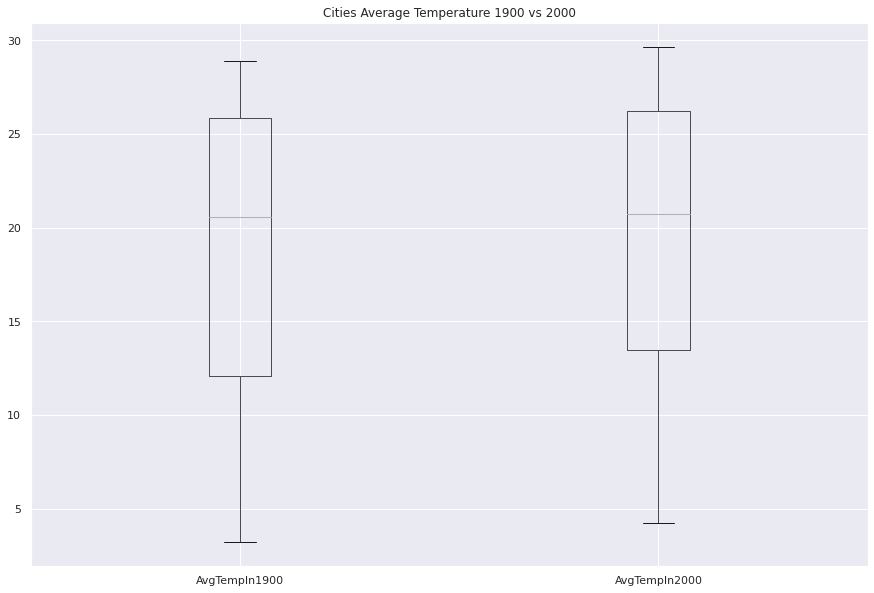

In [ ]:
cities_1900_2000_df.boxplot(column=['AvgTempIn1900', 'AvgTempIn2000'], grid=True)
plt.title('Cities Average Temperature 1900 vs 2000')

From this, we are able to see how the overall temperatures rose
for the cities in just a century, from 1900 to 2000.

We can also see from this dataframe that Saint Petersburg is the city with the greatest change in average temperature from 1900 to 2000. The graph below presents a visualization of the change in average temperature in saint petersburg from 1900 to 2000. 

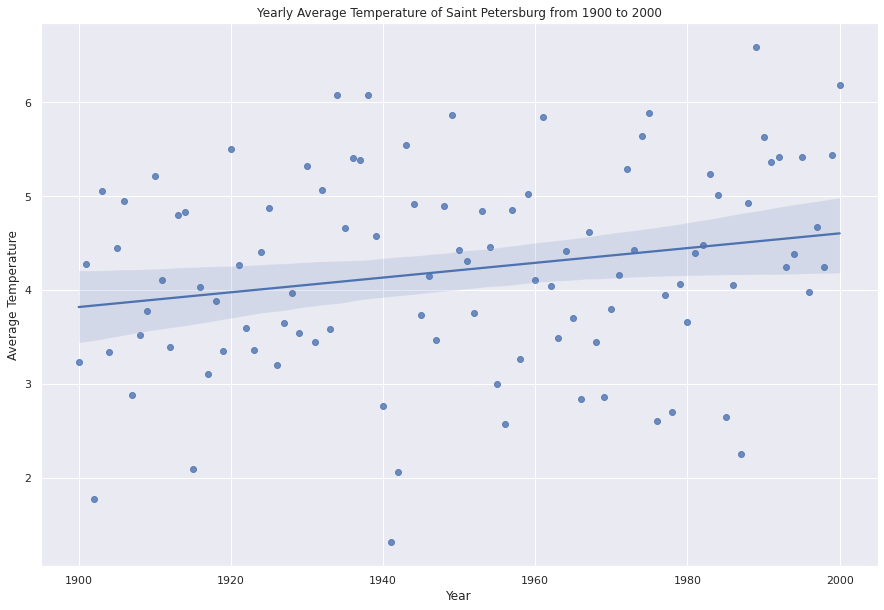

In [ ]:
import scipy as sp

cities_change_df = cities_yearly_df[(cities_yearly_df['Year'] >= 1900) & (cities_yearly_df['Year'] <= 2000)][['City', 'Year', 'AverageTemperature']]
cities_change_df = cities_change_df.sort_values('Year', ascending=True)
st_petersburg_change_df = cities_change_df[cities_change_df['City'] == 'Saint Petersburg']

sns.set(rc = {'figure.figsize':(15,10)})
cities_change_graph = sns.regplot(x = 'Year', y = 'AverageTemperature', data = st_petersburg_change_df)
cities_change_graph.set( xlabel = "Year", ylabel = "Average Temperature")
cities_change_graph.set(title="Yearly Average Temperature of Saint Petersburg from 1900 to 2000")
cities_change_graph

In the graph above, we can see that the line of best fit has a positive slope, demonstrating how the average temperature has increased over time. 

Text(0.5, 1.0, 'Change in average temperature for each city from 1900 to 2000')

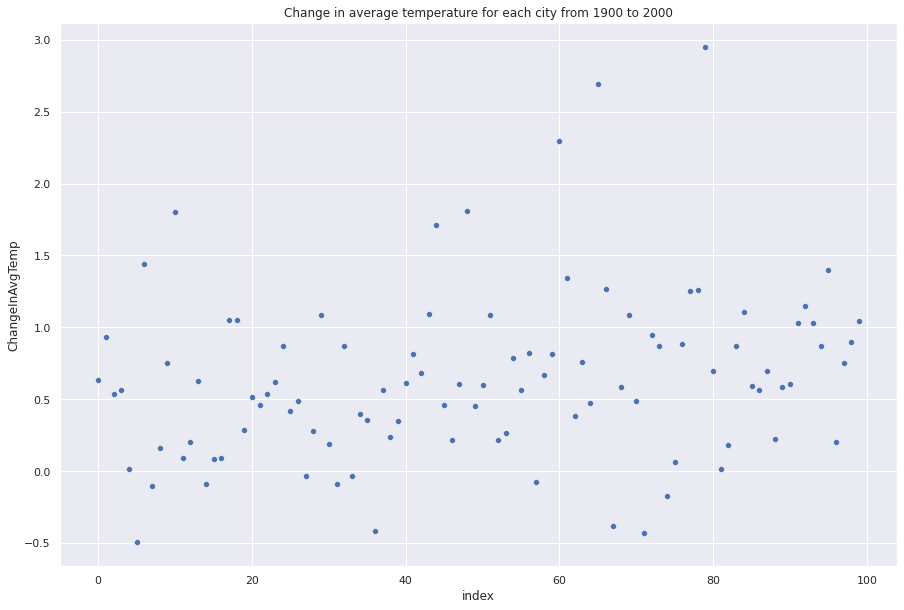

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.scatterplot(data= cities_1900_2000_df, x="index", y="ChangeInAvgTemp")
plt.title('Change in average temperature for each city from 1900 to 2000')

We then wanted to count the number of cities that experienced an increase in average yearly temperature from 1900 to 2000, and the number of cities that experiences a decrease in average yearly temperature from 1900 to 2000. We stored these values in the variables count_less_cities and count_greater_cities respectively.

In [ ]:
count_less_cities = cities_1900_2000_df['ChangeInAvgTemp'][cities_1900_2000_df['ChangeInAvgTemp'] < 0.0].count()
count_greater_cities = cities_1900_2000_df['ChangeInAvgTemp'][cities_1900_2000_df['ChangeInAvgTemp'] > 0.0].count()

In [ ]:
count_less_cities

11

In [ ]:
count_greater_cities

89

From what we can see here, there are 89 cities that have a change in the average temperature that are greater than 0 and 11 cities that have a change in the average temperature that are below 0. That is a 89% rate for increasing temperatures overall in the cities from 1900 to 2000.

We then repeated this whole process with our countries data set. 

In [ ]:
countries_1900_df = countries_yearly_df[countries_yearly_df['Year'] == 1900][['Country', 'AverageTemperature']]
countries_1900_df = countries_1900_df.rename(columns={'AverageTemperature' : 'AvgTempIn1900'})

countries_2000_df = countries_yearly_df[countries_yearly_df['Year'] == 2000][['Country', 'AverageTemperature']]
countries_2000_df = countries_2000_df.rename(columns={'AverageTemperature' : 'AvgTempIn2000'})

countries_1900_2000_df = pd.merge(countries_1900_df, countries_2000_df, how="inner", on=['Country'])
countries_1900_2000_df['ChangeInAvgTemp'] = countries_1900_2000_df['AvgTempIn2000'] - countries_1900_2000_df['AvgTempIn1900']
countries_1900_2000_df = countries_1900_2000_df.sort_values('ChangeInAvgTemp', ascending=False).reset_index()
countries_1900_2000_df

,index,Country,AvgTempIn1900,AvgTempIn2000,ChangeInAvgTemp
0,73,Finland,0.000500,3.590667,3.590167
1,206,Sweden,1.335417,4.421000,3.085583
2,67,Estonia,4.235250,7.008750,2.773500
3,236,Åland,4.547833,7.283333,2.735500
4,156,Norway,-0.930083,1.796917,2.727000
...,...,...,...,...,...
232,34,Burma,24.001917,23.930833,-0.071083
233,165,Paraguay,23.743000,23.626083,-0.116917
234,235,Zimbabwe,21.275833,21.149000,-0.126833
235,29,Botswana,22.021417,21.872333,-0.149083


From this dataframe, we can see that Finland is the country that had the greatest increase in temperature from 1900 to 2000.

Text(0.5, 1.0, 'Countries Average Temperature 1900 vs 2000')

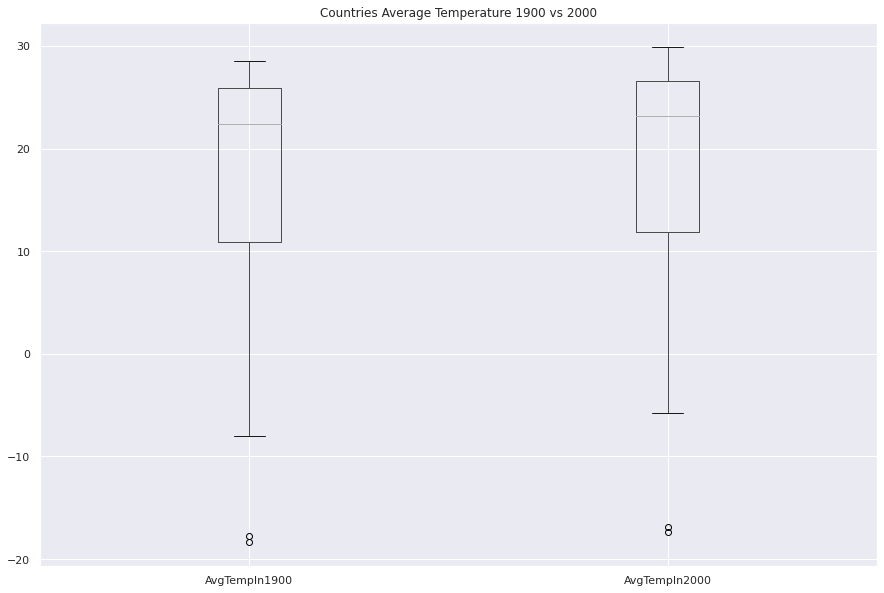

In [ ]:
countries_1900_2000_df.boxplot(column=['AvgTempIn1900', 'AvgTempIn2000'], grid=True)
plt.title('Countries Average Temperature 1900 vs 2000')

From this, we are able to see how the overall temperatures rose for the countries in just a century, from 1900 to 2000.

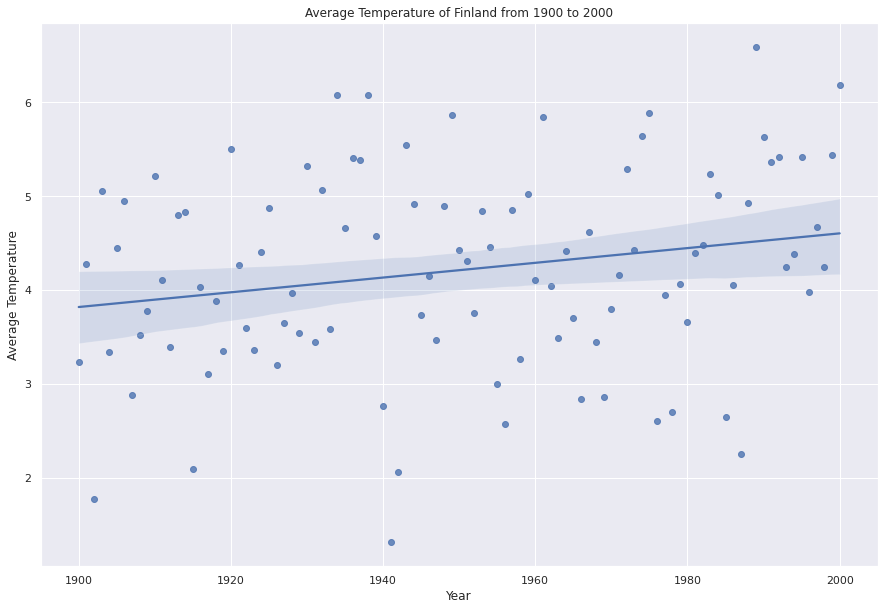

In [ ]:
import scipy as sp

countries_change_df = countries_yearly_df[(countries_yearly_df['Year'] >= 1900) & (countries_yearly_df['Year'] <= 2000)][['Country', 'Year', 'AverageTemperature']]
countries_change_df = countries_change_df.sort_values('Year', ascending=True)
finland_change_df = countries_change_df[countries_change_df['Country'] == 'Finland']

sns.set(rc = {'figure.figsize':(15,10)})
countries_change_graph = sns.regplot(x = 'Year', y = 'AverageTemperature', data = st_petersburg_change_df)
countries_change_graph.set( xlabel = "Year", ylabel = "Average Temperature")
countries_change_graph.set(title="Average Temperature of Finland from 1900 to 2000")
countries_change_graph

Text(0.5, 1.0, 'Change in average temperature for each country from 1900 to 2000')

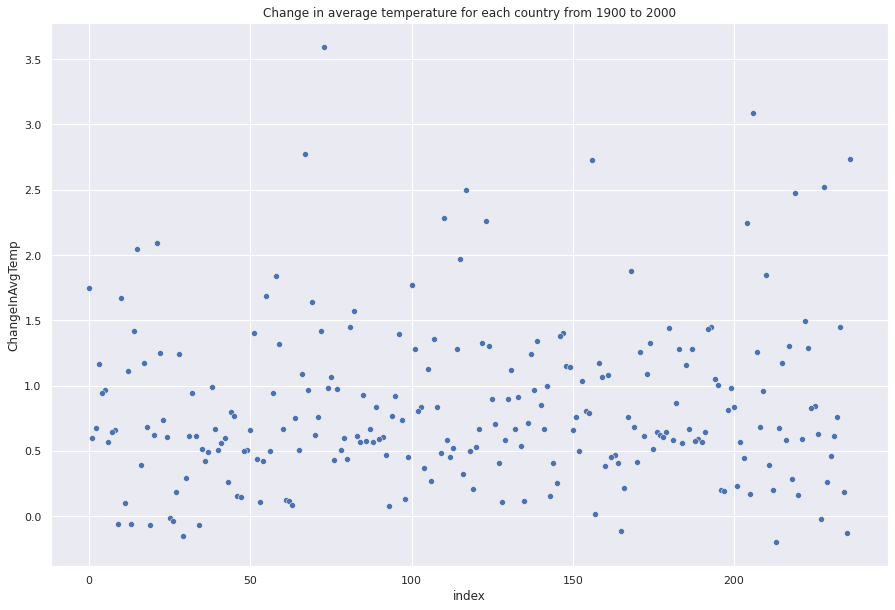

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.scatterplot(data= countries_1900_2000_df, x="index", y="ChangeInAvgTemp")
plt.title('Change in average temperature for each country from 1900 to 2000')

In [ ]:
count_less_countries = countries_1900_2000_df['ChangeInAvgTemp'][countries_1900_2000_df['ChangeInAvgTemp'] < 0.0].count()
count_greater_countries = countries_1900_2000_df['ChangeInAvgTemp'][countries_1900_2000_df['ChangeInAvgTemp'] > 0.0].count()

In [ ]:
count_less_countries

11

In [ ]:
count_greater_countries

226

From what we can see here, there are 226 countries that have a change in the average temperature that are above 0 and 11 countries that have a change in the average temperature that are below 0. That is a 95% rate for increasing temperatures overall in the countries from 1900 to 2000.

We then repeated this whole process with our states data set. 

In [ ]:
states_1900_df = states_yearly_df[states_yearly_df['Year'] == 1900][['State', 'AverageTemperature']]
states_1900_df = states_1900_df.rename(columns={'AverageTemperature' : 'AvgTempIn1900'})

states_2000_df = states_yearly_df[states_yearly_df['Year'] == 2000][['State', 'AverageTemperature']]
states_2000_df = states_2000_df.rename(columns={'AverageTemperature' : 'AvgTempIn2000'})

states_1900_2000_df = pd.merge(states_1900_df, states_2000_df, how="inner", on=['State'])
states_1900_2000_df['ChangeInAvgTemp'] = states_1900_2000_df['AvgTempIn2000'] - states_1900_2000_df['AvgTempIn1900']
states_1900_2000_df = states_1900_2000_df.sort_values('ChangeInAvgTemp', ascending=False).reset_index()
states_1900_2000_df

,index,State,AvgTempIn1900,AvgTempIn2000,ChangeInAvgTemp
0,182,Samara,2.218583,5.773500,3.554917
1,184,Saratov,3.540333,7.014250,3.473917
2,86,Karelia,0.018500,3.470917,3.452417
3,215,Ul'Yanovsk,2.137333,5.540250,3.402917
4,129,Murmansk,-2.343583,0.951333,3.294917
...,...,...,...,...,...
236,100,Krasnoyarsk,-3.718833,-4.128917,-0.410083
237,45,District Of Columbia,12.712083,12.277750,-0.434333
238,171,Queensland,23.534250,23.050250,-0.484000
239,47,Evenk,-10.471833,-11.277917,-0.806083


From this dataframe, we can see that Samara is the state with the greatest increase in temperature from 1900 to 2000.

Text(0.5, 1.0, 'States Average Temperature 1900 vs 2000')

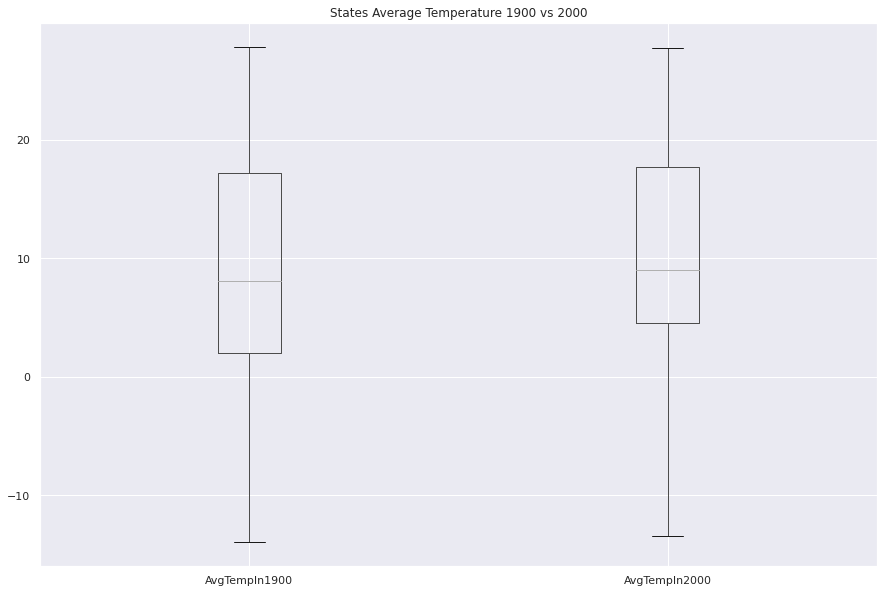

In [ ]:
states_1900_2000_df.boxplot(column=['AvgTempIn1900', 'AvgTempIn2000'], grid=True)
plt.title('States Average Temperature 1900 vs 2000')

From this, we are able to see how the overall temperatures rose for the states in just a century, from 1900 to 2000.

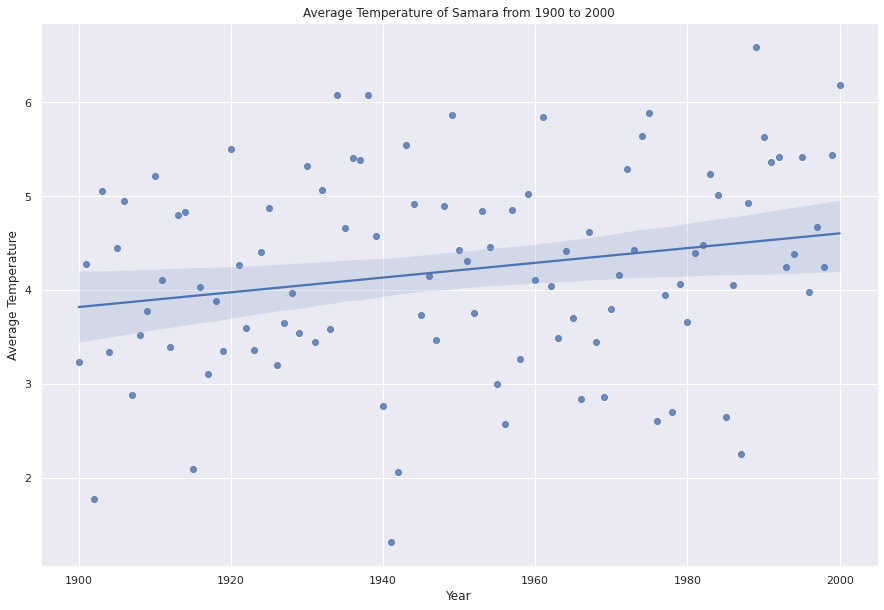

In [ ]:
import scipy as sp

states_change_df = states_yearly_df[(states_yearly_df['Year'] >= 1900) & (states_yearly_df['Year'] <= 2000)][['State', 'Year', 'AverageTemperature']]
states_change_df = states_change_df.sort_values('Year', ascending=True)
samara_change_df = states_change_df[states_change_df['State'] == 'Samara']

sns.set(rc = {'figure.figsize':(15,10)})
states_change_graph = sns.regplot(x = 'Year', y = 'AverageTemperature', data = st_petersburg_change_df)
states_change_graph.set( xlabel = "Year", ylabel = "Average Temperature")
states_change_graph.set(title="Average Temperature of Samara from 1900 to 2000")
states_change_graph

Text(0.5, 1.0, 'Change in average temperature for each state from 1900 to 2000')

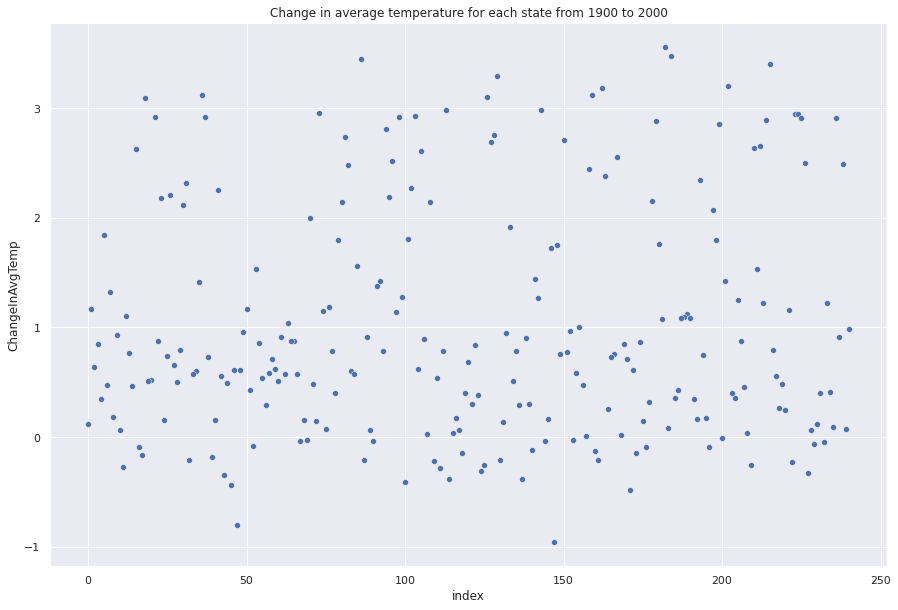

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.scatterplot(data= states_1900_2000_df, x="index", y="ChangeInAvgTemp")
plt.title('Change in average temperature for each state from 1900 to 2000')

In [ ]:
count_less_states = states_1900_2000_df['ChangeInAvgTemp'][states_1900_2000_df['ChangeInAvgTemp'] < 0.0].count()
count_greater_states = states_1900_2000_df['ChangeInAvgTemp'][states_1900_2000_df['ChangeInAvgTemp'] > 0.0].count()

In [ ]:
count_less_states

38

In [ ]:
count_greater_states

203

From what we can see here, there are 203 states that have a change in the average temperature that are above 0 and 38 states that have a change in the average temperature that are below 0. That is a 84% rate for increasing temperatures overall in the states from 1900 to 2000.

# Section 3: Using Machine Learning to Make Temperature Predictions

In this section, we want to be able to use machine learning to see how temperatures are going to look like in the future and make some predictions. So, we now want to be able to predict the average temperature in 2050. We will do so by training our model in the following ways:

To start, we need to create new dataframes for cities, countries, and states. We need to do this because we want to have them sorted by both year and city.

In [ ]:
cities_ML_df = cities_yearly_df.sort_values(['City', 'Year'], ascending=True)
cities_ML_one_df = cities_ML_df[cities_ML_df['City'] == 'Saint Petersburg']
cities_ML_one_df = cities_ML_one_df.set_index('Year')

In [ ]:
cities_ML_one_df

,City,AverageTemperature,AverageTemperatureUncertainty
Year,,,
1743,Saint Petersburg,0.416000,1.857000
1744,Saint Petersburg,6.192000,1.610125
1745,Saint Petersburg,-6.385750,1.421250
1750,Saint Petersburg,4.728364,2.024727
1751,Saint Petersburg,4.383375,1.819625
...,...,...,...
2009,Saint Petersburg,5.177417,0.285000
2010,Saint Petersburg,4.239917,0.306917
2011,Saint Petersburg,6.056250,0.301250


In [ ]:
countries_ML_df = countries_df.sort_values(['Country', 'Year'], ascending=True)
countries_ML_df = countries_ML_df.groupby(['Country', 'Year']).mean().reset_index()
countries_ML_df = countries_ML_df[countries_ML_df['Country'] == 'China']
countries_ML_df = countries_ML_df.set_index('Year')

In [ ]:
countries_ML_df

,Country,AverageTemperature,AverageTemperatureUncertainty
Year,,,
1820,China,5.013600,1.552800
1821,China,6.284167,1.680750
1822,China,6.341417,1.640167
1823,China,7.024364,1.641364
1833,China,6.039333,1.546750
...,...,...,...
2009,China,7.809500,0.169083
2010,China,7.548417,0.193667
2011,China,7.357083,0.182333


In [ ]:
states_ML_df = states_df.sort_values(['State', 'Year'], ascending=True)
states_ML_df = states_ML_df.groupby(['State', 'Year']).mean().reset_index()
states_ML_df = states_ML_df[states_ML_df['State'] == 'District Of Columbia']
states_ML_df = states_ML_df.set_index('Year')

In [ ]:
states_ML_df

,State,AverageTemperature,AverageTemperatureUncertainty
Year,,,
1743,District Of Columbia,5.339000,2.247000
1744,District Of Columbia,13.880750,2.207250
1745,District Of Columbia,3.996250,2.039500
1750,District Of Columbia,12.505909,2.105455
1751,District Of Columbia,13.277750,2.045500
...,...,...,...
2009,District Of Columbia,12.437667,0.258083
2010,District Of Columbia,13.280833,0.238750
2011,District Of Columbia,13.557250,0.274417


For all of the following predictions, we used SARIMAX. SARIMAX is seasonal ARIMA which was of a better use that just using ARIMA.

**Predicting temperature change over time for a city, Saint Petersburg**

---

We will start with predicting the temperature change in St. Petersburg for the year 2050.

In [ ]:
model = sm.tsa.statespace.SARIMAX(cities_ML_one_df['AverageTemperature'], order=(2, 1, 0), seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
pred_df = pd.DataFrame(results.predict(end=307))
pred_df.index = np.arange(1743, len(pred_df) + 1743)
pred_df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,0
1743,0.000000
1744,0.415999
1745,6.191978
1746,-6.385701
1747,4.728330


Now, we want to plot this and see what the temperature will look like in 2050.

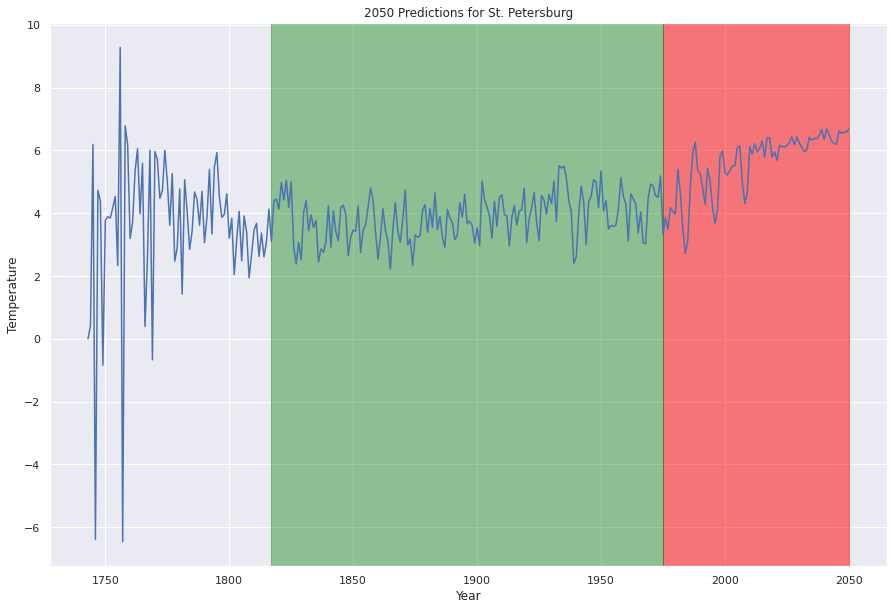

In [ ]:
plt.plot(pred_df)
plt.title('2050 Predictions for St. Petersburg')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.axvspan(1975, 2050, color='red', alpha=0.5)
plt.axvspan(1817, 1975, color='green', alpha=0.4)

We are able to see a multiude of things from this graph. We mainly are able to see the predicted values for the next 40 years. It is predicted from out graph above to have an average temperature of around 6.5 degree celsius in St. Petersburg in 2050. We denoted the green block of the graqph to show consistency and not too much of a rise in the average temperatures, but then the red block for when the average began to rise increasingly.

**Predicting temperature change over time for a country, China**


---



We will continue by predicting the temperature change in China for the year 2050.

In [ ]:
model_countries = sm.tsa.statespace.SARIMAX(countries_ML_df['AverageTemperature'], order=(2, 1, 0), seasonal_order=(1,1,1,12))
results_countries = model_countries.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
pred_df_2 = pd.DataFrame(results_countries.predict(end=230))
pred_df_2.index = np.arange(1820, len(pred_df_2) + 1820)
pred_df_2.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,0
1820,0.000000
1821,5.013600
1822,6.284166
1823,6.341417
1824,7.024364


Now, we want to plot this and see what the temperature will look like in 2050.

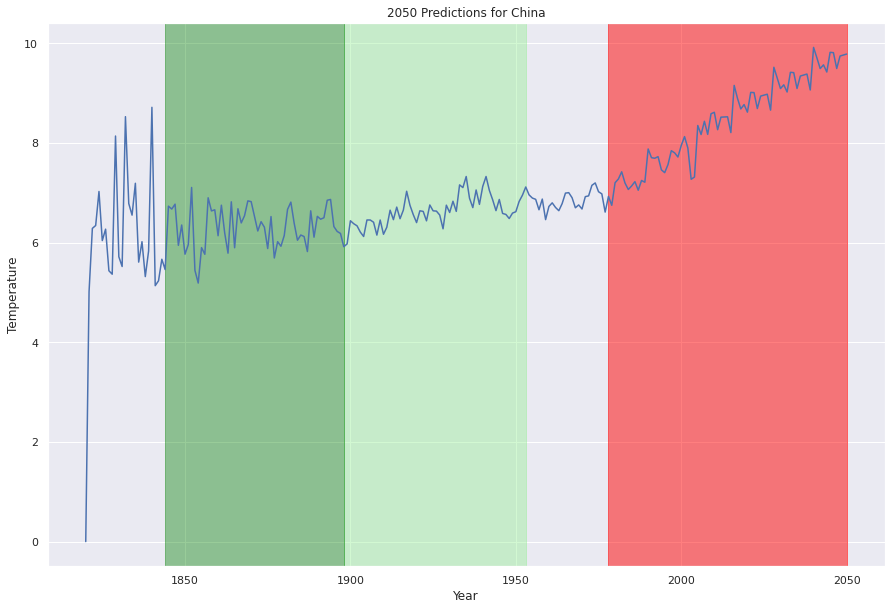

In [ ]:
plt.plot(pred_df_2)
plt.title('2050 Predictions for China')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.axvspan(1978, 2050, color='red', alpha=0.5)
plt.axvspan(1898, 1953, color='lightgreen', alpha=0.4)
plt.axvspan(1844, 1898, color='green', alpha=0.4)

We are able to see a multiude of things from this graph. We mainly are able to see the predicted values for the next 40 years. It is predicted from out graph above to have an average temperature of around 9.8 degree celsius in China in 2050. We denoted the green block of the graqph to show consistency and not too much of a rise in the average temperatures. The light green block shows moderate rise in temperature overtime. Lastly, the red block denotes the unfortunate of when the average temperature began to rise increasingly.

**Predicting temperature change over time for a state, District of Columbia**


---



In [ ]:
model_states = sm.tsa.statespace.SARIMAX(states_ML_df['AverageTemperature'], order=(2, 1, 0), seasonal_order=(1,1,1,12))
results_states = model_states.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
pred_df_3 = pd.DataFrame(results.predict(end=307))
pred_df_3.index = np.arange(1743, len(pred_df_3) + 1743)
pred_df_3.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,0
1743,0.000000
1744,0.415999
1745,6.191978
1746,-6.385701
1747,4.728330


Now, we want to plot this and see what the temperature will look like in 2050.

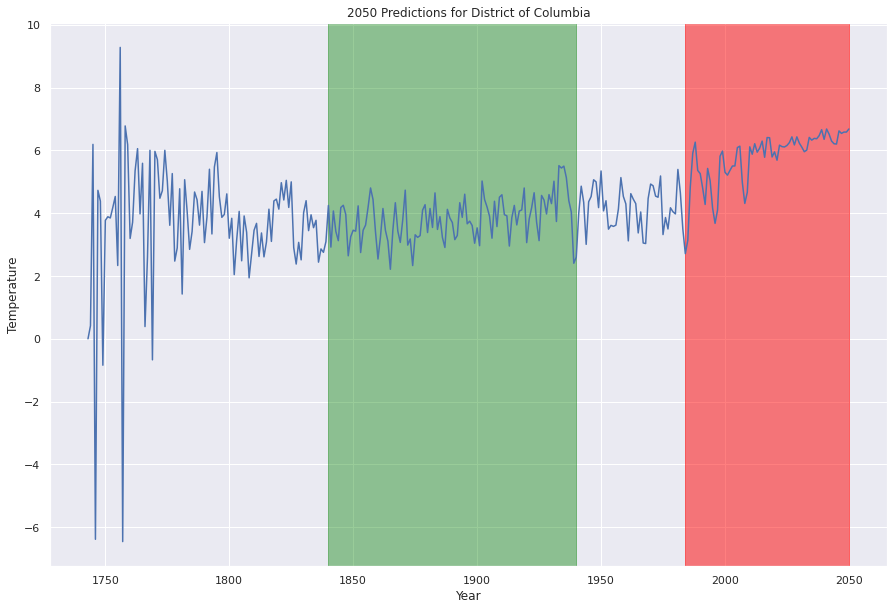

In [ ]:
plt.plot(pred_df_3)
plt.title('2050 Predictions for District of Columbia')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.axvspan(1984, 2050, color='red', alpha=0.5)
plt.axvspan(1840, 1940, color='green', alpha=0.4)

We are able to see a multiude of things from this graph. We mainly are able to see the predicted values for the next 40 years. It is predicted from out graph above to have an average temperature of around 6.5 degree celsius in the District of Columbia in 2050. We denoted the green block of the graqph to show consistency and not too much of a rise in the average temperatures. The red block denotes the unfortunate of when the average temperature began to rise increasingly.

**Failed predictions of temperature change over time**

---

We were encouraged to keep the models we tried that did not work out well in the notebook too. So, we had initlaly started with using ARIMA, instead of the seasonal version of ARIMA and we found we were not getting optimal results. So, we switched to seasonal ARIMA. 

We also did not pursue this more as we were using the entire city data, not just pickmign from one city.

In [ ]:
cities_df_fail = cities_yearly_df.sort_values(['City', 'Year'], ascending=True)
cities_df_fail = cities_df_fail.groupby(['City']).mean().reset_index()
cities_df_fail = cities_df_fail.set_index('Year')
cities_df_fail

,City,AverageTemperature,AverageTemperatureUncertainty
Year,,,
1937.258278,Abidjan,26.162346,0.689455
1942.624113,Addis Abeba,17.525771,0.837179
1908.271845,Ahmadabad,26.530827,0.958051
1909.355769,Aleppo,17.358425,0.984541
1902.000000,Alexandria,20.317915,0.995250
...,...,...,...
1929.000000,Tokyo,12.565692,0.615129
1879.955056,Toronto,5.721925,1.296960
1938.865772,Umm Durman,29.061975,0.898625


Text(0, 0.5, 'Temperature')

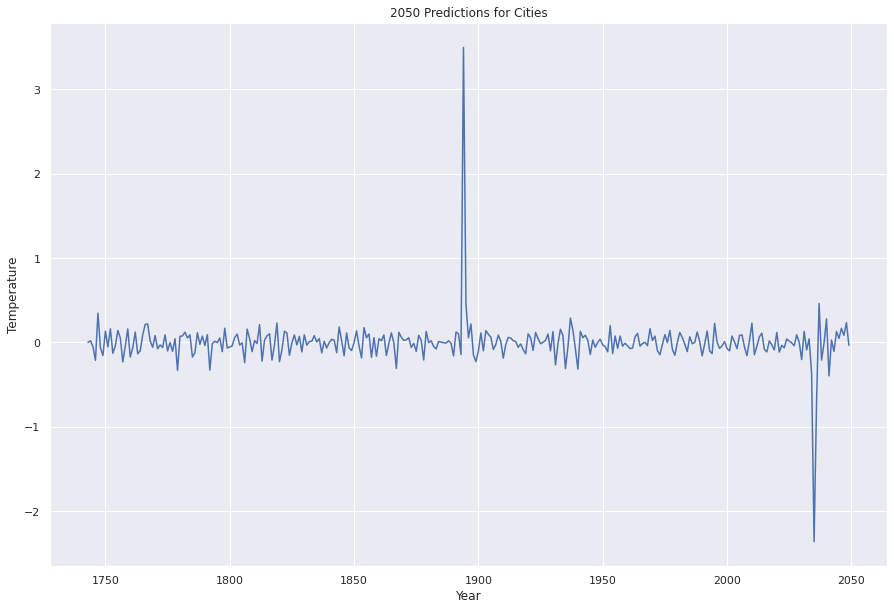

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(np.asarray(cities_ML_df['AverageTemperature']), order=(1,1,1))
results_cities = model.fit()
results_cities.summary()

pred_cities = pd.DataFrame(results_cities.predict(end=307))
pred_cities.index = np.arange(1743, len(pred_cities) + 1743)
pred_cities.head()

plt.plot(pred_cities)
plt.title('2050 Predictions for Cities')
plt.xlabel('Year')
plt.ylabel('Temperature')

In [ ]:
predictions_cities_ARIMA_diff = pd.Series(results_cities.fittedvalues, copy=True)
predictions_cities_ARIMA_diff.head()

0   -0.000616
1    0.020084
2   -0.050287
3   -0.212764
4    0.346680
dtype: float64

In [ ]:
predictions_cities_ARIMA_cumsum = predictions_cities_ARIMA_diff.cumsum()
predictions_cities_ARIMA_cumsum.head()

0   -0.000616
1    0.019468
2   -0.030819
3   -0.243583
4    0.103098
dtype: float64

## Section 4: Looking at Correlation with Natural Disasters

In this section, we aim to be able to illustrate the connection that exists between the influx of natural disasters and the rising temperatures that we saw above. We focus on a metric defined as 'total_affected_rate_per_100k_all_disasters' because it is the most wholistic representation for natural callamities that can manifest in many different ways. This metric includes the deaths, fiscal losses, homelessness and injuries of:

*   Drought
*   Earthquakes
* Volcanos
* Floods
* Storms, Landslides, etc.
* Wildfires
* Extreme Temperatures





In [ ]:
disasters_df = pd.read_csv('natural-disasters.csv')
disasters_parsed_df = disasters_df[["Entity", "Year", "total_affected_rate_per_100k_all_disasters"]]

In [ ]:
disasters_parsed_df

,Entity,Year,total_affected_rate_per_100k_all_disasters
0,Afghanistan,1950,2.381236
1,Afghanistan,1960,44.060951
2,Afghanistan,1970,547.029875
3,Afghanistan,1980,218.081859
4,Afghanistan,1990,316.150814
...,...,...,...
1599,Zimbabwe,1970,0.000000
1600,Zimbabwe,1980,0.000000
1601,Zimbabwe,1990,4839.765250
1602,Zimbabwe,2000,7023.254487


We can see above that these Entities above are the total disaster rates every ten years for major countries. We want to be able to compare them to the above country datasets to find interesting correlations of natural disasters and rising surface temperatures

---



Want to find the total number of entities (countries) represented - Note that a 'World' count exists

In [ ]:
grouped_disasters_df = disasters_parsed_df.groupby(by="Entity").count()
print(len(grouped_disasters_df))
print(grouped_disasters_df)

226
                Year  total_affected_rate_per_100k_all_disasters
Entity                                                          
Afghanistan        7                                           7
Africa            12                                          12
Albania           12                                          12
Algeria           11                                          11
American Samoa     5                                           5
...              ...                                         ...
World             12                                          12
Yemen              3                                           3
Yugoslavia         6                                           6
Zambia             5                                           5
Zimbabwe           5                                           5

[226 rows x 2 columns]


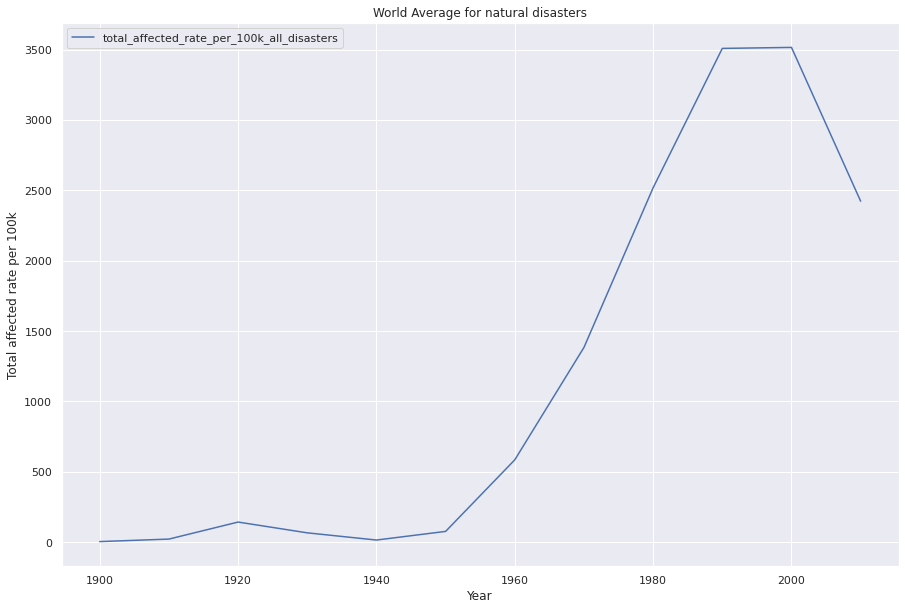

In [ ]:
world_plot_df = disasters_parsed_df[disasters_parsed_df['Entity'] == 'World']
world_plot_df.plot(x ='Year', y='total_affected_rate_per_100k_all_disasters', kind = 'line', legend=True)
plt.xlabel('Year') 
plt.ylabel('Total affected rate per 100k')
plt.title("World Average for natural disasters")
plt.show()

We are able to see here from the graph above that there was a huge jump in disasters from around 1950 to 1990. The jump goes from around 50 a year to as many as 3,500 disasters a year on average for the world. 

Next, we will look at the data for the top 5 entities that are global polluters:


In [ ]:
china_plot_df = disasters_parsed_df[disasters_parsed_df['Entity'] == 'China']
india_plot_df = disasters_parsed_df[disasters_parsed_df['Entity'] == 'India']
unitedstates_plot_df = disasters_parsed_df[disasters_parsed_df['Entity'] == 'United States']
russia_plot_df = disasters_parsed_df[disasters_parsed_df['Entity'] == 'Russia']
japan_plot_df = disasters_parsed_df[disasters_parsed_df['Entity'] == 'Japan']
five_largest_df = china_plot_df.merge(india_plot_df,left_on="Year", right_on="Year", how="outer")
five_largest_df = five_largest_df.rename(columns={'total_affected_rate_per_100k_all_disasters_x': 'total_affected_rate_per_100k_all_disasters_china', 
                                                  'total_affected_rate_per_100k_all_disasters_y': 'total_affected_rate_per_100k_all_disasters_india'})
five_largest_df = five_largest_df.merge(unitedstates_plot_df, on='Year', how="outer")
five_largest_df = five_largest_df.rename(columns={'total_affected_rate_per_100k_all_disasters': 'total_affected_rate_per_100k_all_disasters_unitedstates'})
five_largest_df = five_largest_df.merge(russia_plot_df, on='Year', how="outer")
five_largest_df = five_largest_df.rename(columns={'total_affected_rate_per_100k_all_disasters': 'total_affected_rate_per_100k_all_disasters_russia'})
five_largest_df = five_largest_df.merge(japan_plot_df, on='Year', how="outer")
five_largest_df = five_largest_df.rename(columns={'total_affected_rate_per_100k_all_disasters': 'total_affected_rate_per_100k_all_disasters_japan'})

Below is a graph to show the trends for the 5 largest global polluters:

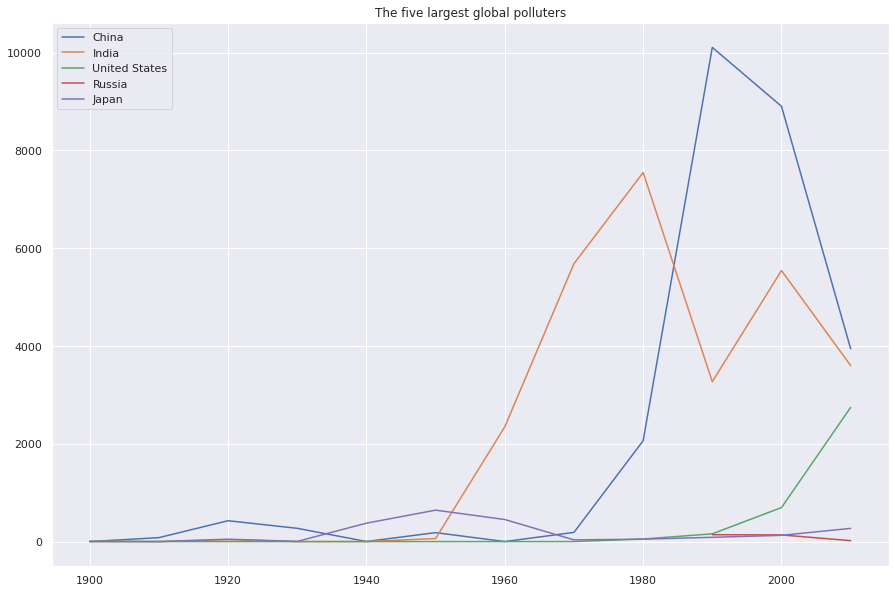

In [ ]:
plt.plot(five_largest_df['Year'], five_largest_df['total_affected_rate_per_100k_all_disasters_china'], label='China')
plt.plot(five_largest_df['Year'], five_largest_df['total_affected_rate_per_100k_all_disasters_india'], label='India')
plt.plot(five_largest_df['Year'], five_largest_df['total_affected_rate_per_100k_all_disasters_unitedstates'], label='United States')
plt.plot(five_largest_df['Year'], five_largest_df['total_affected_rate_per_100k_all_disasters_russia'], label='Russia')
plt.plot(five_largest_df['Year'], five_largest_df['total_affected_rate_per_100k_all_disasters_japan'], label='Japan')
plt.title('The five largest global polluters')
plt.legend()
plt.show()

This graph tells us the top contributers to pollution also had a plethora of natural disasters occur also during this time from around the 1950s to 1990s, showing how global warming has contributed to a rise in natural disasters. Here, they also keep continuing into the 2000s as well, but the main peaks are between the 1950s and 1990s, especially for China and India.

### Now we are going to look at Greenhouse Gasses and use this to include as features in predicting the AverageTemperature of Countries

In [ ]:
greenhouse_df = pd.read_csv('greenhouse_gas_inventory_data_data.csv')
greenhouse_df = greenhouse_df.rename(columns={'value': 'tons_gas_outputed'})
greenhouse_df.head()

,country_or_area,year,tons_gas_outputed,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [ ]:
countries_yearly_df.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,1838,18.379571,2.756000
1,Afghanistan,1840,13.413455,2.502000
2,Afghanistan,1841,13.997600,2.452100
3,Afghanistan,1842,15.154667,2.381222
4,Afghanistan,1843,13.756250,2.353083


In [ ]:
merged_countries = pd.merge(countries_yearly_df, greenhouse_df, left_on='Country', right_on="country_or_area")

The purpose of creating a grouped_countries is to relate the tons_gas_outputed to the other dataframes that we have so that it can later be used as a feature to help predict the GlobalTemperature rises

In [ ]:
grouped_countries = merged_countries[['Country', 'AverageTemperature', 'tons_gas_outputed']].groupby("Country").mean()

In [ ]:
average_year_disasters_df = disasters_df.groupby(["Entity"]).mean().reset_index()
features_df = pd.merge(average_year_disasters_df, grouped_countries, left_on="Entity", right_on="Country", how="inner")

The following features that are used in order to predict the temperature are all used for specific purposes:

*   Number of deaths from drought
** Wanted to have drought representation as it is typically correlated with dry and hot temperatures. Further, have tested using different statistics that relate to droughts and wanted to include a feature that has to do with deaths to test if deaths are a correlated featue (which we have shown below is)
*   Total economic damages from storms as a share of GDP
** Storms are also a factor that relates to temperatures. The reason for looking at GDP strain is to see how much this factor correlates with higher Temperatures, to demonstrate an economic incentive to act to prevent these upwards facing trends
* Total economic damages from volcanic activity as a share of GDP
** Similar rationale to above, but through looking at volcanos to simply test the relationship of more types of natural disasters with the rising temperatures
* injured_rate_per_100k_storm
** Used to diversify the catagories of disaster that are being used as features
* total_affected_rate_per_100k_all_disasters
** This is the most overarching of all of the features and is used to show the different types of natural disasters all cumulated into one statistic
* tons_gas_outputed
** This feature is different from all those above and is meant to connect a countries pollution to the rises of temperatures

In [ ]:
features_df = features_df[['Number of deaths from drought','Total economic damages from storms as a share of GDP', 
                           'Total economic damages from volcanic activity as a share of GDP.1', 'deaths_rate_per_100k_storm',
                           'injured_rate_per_100k_storm', 'total_affected_rate_per_100k_all_disasters', 'tons_gas_outputed',
                           'Entity', 'AverageTemperature']]

In [ ]:
features = features_df.drop(columns=['Entity', 'AverageTemperature'])
#Creating the Temperature Prediction
temperature = features_df['AverageTemperature']

Split the data into testing and training:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, temperature, test_size=0.8, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
x = LinearRegression().fit(x_train, y_train)
y_pred = x.predict(x_test)
score = abs(x.score(x_test, y_test))
print(score)

0.807918596021159


Using the features outlined above we were able to come up with a linear regression model that fits with an R^2 score of 0.807.
This demonstrates that factors that were outlined, various natural disaster information and pollution levels, have an incredibly high relationship with the AverageTemperature of the country.

# Conclusion

Let us summarize some of the most important results:
*   Our predictions indicate that without changes to the current trends we will reach the levels of risen temperature that the UN Climate Report deemed 'too far to come back from' within the next two decades.
*   Over time, there is generally a correlation that includes an increase in pollution in the ability to predict a Country (and world's) rise in Global Temperature. We originally attemped to split this up country by country in terms of pollution, but were not able to create a strong correlation because countries that border each other and have very different policies would still see similar trends purely due to regional proximity. 
*   There is a strong correlation among countries that are experiencing a rise of natural disasters and countries that are the top pollutants.
*   Last, but definitely not least, we can see that the vast majority of countries, states, and cities all have increasing temperatures and have an average temperature that has only increased thus far. The *lowest* rate of increase this far has been the states at an 84% rate for increasing temperatures overall from 1900 to 2000. This is not a low percentage and was only over a century. 


In conclusion, we have confirmed with data many of the fears behind climate change at its current rate. What this data, and no data from the past, can tell you is exactly what will happen in the distant future where technological innovation and international efforts may be able to hinder the rates that we have predicted. So to end this notebook we advise the reader to look into the ways that they can slow the compounding rates in which we see today. Thank you!